In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('Phising_Training_Dataset.csv')
data

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,21294,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
8951,21295,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
8952,21296,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
8953,21297,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [38]:
data.shape

(8955, 32)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

This shows that there are no null or missing values

**Visualizing Data**

Few plots and graphs to display how data is distributed and how features are related to each other

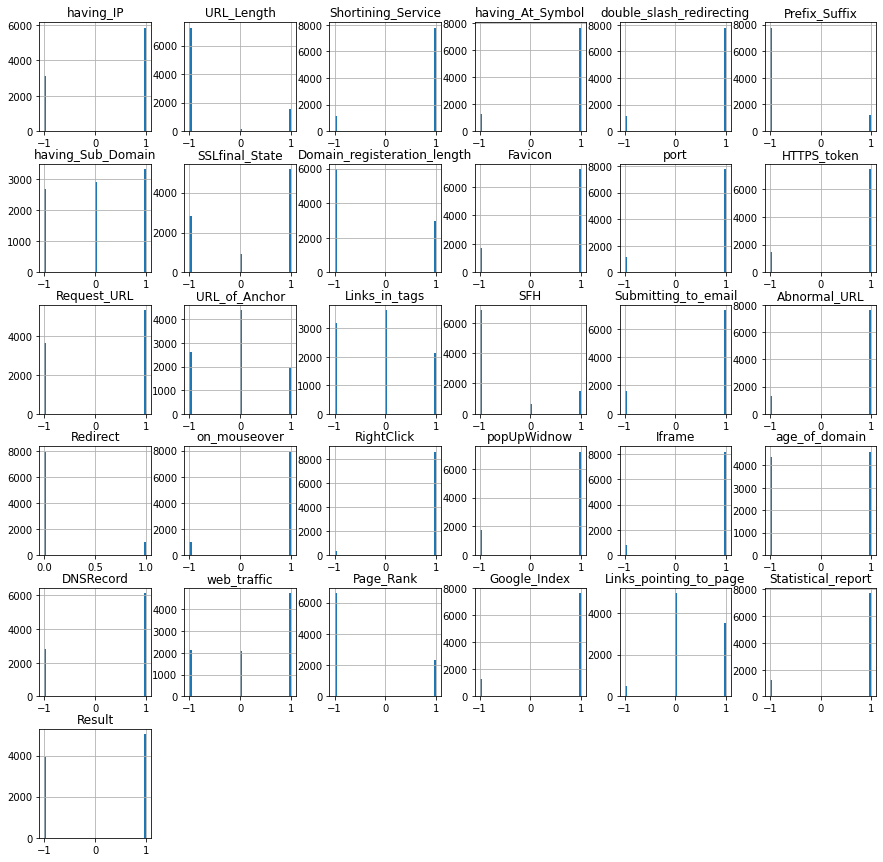

In [40]:
data.iloc[:,1:].hist(bins = 50, figsize = (15,15))
plt.show()

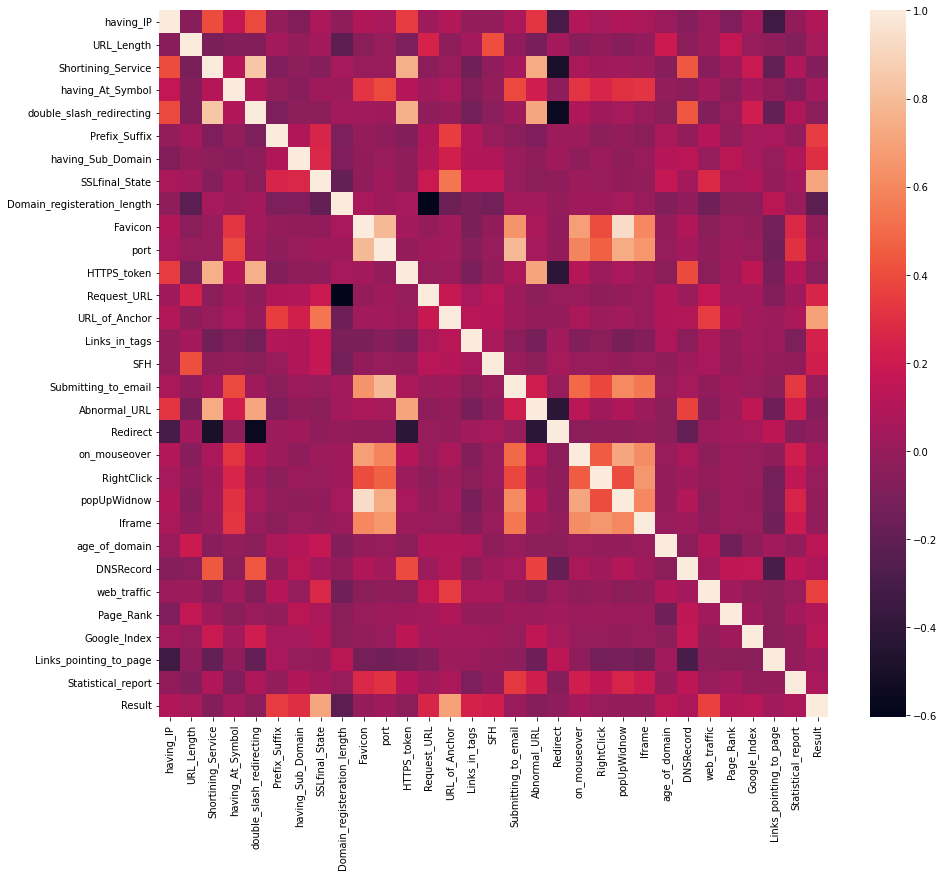

In [41]:
plt.figure(figsize=(15,13))
sns.heatmap(data.iloc[:,1:].corr())
plt.show()

In [42]:
data_new = data.drop(['key'], axis = 1).copy() # key column does not have any significance for model training, so dropped it

In [43]:
data_new.isnull().sum()

having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

**Splitting of Data**

In [44]:
X = data_new.drop('Result', axis = 1).values
y = data_new['Result'].values
X.shape, y.shape

((8955, 30), (8955,))

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((7164, 30), (1791, 30))

**Model Training**

Here we will take 3 classifier models into consideration and check their accuracy to determine which would be best.

**1.Decision Tree Alogrithm**

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [47]:
y_pred = tree.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 1 -1]
 [-1 -1]
 [ 1  1]
 ...
 [-1 -1]
 [-1 -1]
 [ 1  1]]


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[678 117]
 [ 26 970]]


0.9201563372417644

**2. Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(max_depth = 5)
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [50]:
y_pred = forest_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 1 -1]
 [-1 -1]
 [ 1  1]
 ...
 [-1 -1]
 [-1 -1]
 [ 1  1]]


In [51]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
accuracy_score(y_test, y_pred)

[[696  99]
 [ 31 965]]


0.9274148520379676

**3. XGBoost Classifier**

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder =False, learning_rate=0.4, max_depth=7)
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7, use_label_encoder=False)

In [53]:
y_pred = xgb.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[-1 -1]
 [-1 -1]
 [ 1  1]
 ...
 [-1 -1]
 [-1 -1]
 [ 1  1]]


In [54]:
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)
accuracy_score(y_test, y_pred)

[[756  39]
 [ 24 972]]


0.964824120603015

So, we can see XGBoost algorithm has high accuracy as compared to others.

Now, here we are going to test the above model on other dataset to get the result

In [55]:
data_test = pd.read_csv('Phising_Testing_Dataset.csv')
data_test

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,23433,-1,-1,-1,1,-1,-1,1,1,1,...,1,1,1,1,-1,1,-1,-1,1,1
2096,23434,1,1,1,-1,1,-1,1,1,-1,...,1,-1,1,-1,1,-1,1,1,1,1
2097,23435,1,-1,1,1,1,-1,-1,-1,1,...,1,1,1,-1,1,0,-1,1,0,1
2098,23436,1,-1,1,-1,1,-1,0,-1,-1,...,1,-1,-1,1,1,-1,-1,1,1,1


In [56]:
data_test.shape

(2100, 31)

In [57]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          2100 non-null   int64
 1   having_IP                    2100 non-null   int64
 2   URL_Length                   2100 non-null   int64
 3   Shortining_Service           2100 non-null   int64
 4   having_At_Symbol             2100 non-null   int64
 5   double_slash_redirecting     2100 non-null   int64
 6   Prefix_Suffix                2100 non-null   int64
 7   having_Sub_Domain            2100 non-null   int64
 8   SSLfinal_State               2100 non-null   int64
 9   Domain_registeration_length  2100 non-null   int64
 10  Favicon                      2100 non-null   int64
 11  port                         2100 non-null   int64
 12  HTTPS_token                  2100 non-null   int64
 13  Request_URL                  2100 non-null   int

In [58]:
data_test_new = data_test.drop(['key'], axis = 1).copy()

In [59]:
data_test_new.isnull().sum()

having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
dtype: int

In [60]:
data_test_new.shape

(2100, 30)

In [61]:
new_pred_1 = xgb.predict(data_test_new.values)
new_pred_1

array([ 1, -1, -1, ..., -1,  1,  1])

In [62]:
print(new_pred_1.reshape(len(new_pred_1),1))

[[ 1]
 [-1]
 [-1]
 ...
 [-1]
 [ 1]
 [ 1]]


**This is the predicted result of the Phishing Testing Dataset obtained with the help of XGB Classifier**

In [64]:
type(new_pred_1)

numpy.ndarray

In [65]:
data_test['Result'] = new_pred_1.tolist()

In [66]:
data_test

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,-1,0,1,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,-1,-1,0,-1,-1,0,1,-1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,1,-1,1,-1,1,1,-1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,-1,-1,1,-1,1,-1,1,1,-1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,-1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,23433,-1,-1,-1,1,-1,-1,1,1,1,...,1,1,1,-1,1,-1,-1,1,1,1
2096,23434,1,1,1,-1,1,-1,1,1,-1,...,-1,1,-1,1,-1,1,1,1,1,1
2097,23435,1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,0,-1,1,0,1,-1
2098,23436,1,-1,1,-1,1,-1,0,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1


In [68]:
header = ["key", "Result"]
data_test.to_csv('Phising_Output.csv', columns = header, index = False)